First part of laboratories were conducted by <a href="https://github.com/makskliczkowski">Maksymilian Kliczkowski</a>. He created notebooks we used in laboratories and he help me and my friends with understanding basic and advanced topics in machine learning. I am really glad that I had him as a tutor.

In first course of ML/AI we were build ML models from the ground using math.

In this notebook I will present only some task we had as a homework from notebook about scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron as Perc

### 1. Given is a perceptron with predefined weights:
- $ w _0 = b = 2 $ (bias),
- $ w_1 = 1$,
- $ w_2 = 1$

a) What is the dimension of the original input vector of the perceptron?

b) Write the weights as a numpy vector and check what is the output for vectors for range of $[-2, 2]$ for each of the dimensions.

What separation does this perceptron represent?
- plot the separation as a 2D plot based on the output of the Perceptron.

In [ ]:
w = np.array([2,1,1])
x = np.array([[1,-2,2], [1,2,2]])
y = w.dot(x.T)

### 2. Construct your own perceptron class.
It should have the field for the dimension and have the setters and getters implemented. It should also implement the multiplication treated as the dot product (what the activation function acts on). For now, keep the activation function to be defined as before.

- Implement all the methods.
- Test the class.

In [ ]:
class Perceptron:
    # Initialize the bias and the dimension of the perceptron.
    # Initialize the weights to be zero (for now at least)
    def __init__(self, W : np.array,  b = 0):
        self.W = W
        self.N = len(W)
        self.b = b

    # Create getters for the perceptron.
    def get_N(self):
      return self.N

    def get_b(self):
      return self.b

    def get_W(self):
      return self.W

    ############################## SETTERS ##############################

    # Create setters for the perceptron
    def set_N(self, N):
        self.N = N

    def set_b(self, b):
        self.b = b

    def set_W(self, W : np.array):
        self.W = W

    ############################## GETTERS ##############################

    # override __getitem__ method to obtain the weight at a certain position
    # remember that you need also to override __setitem__, __getslice__
    def __getitem__(self, key=None):
      if key == None:
        return self.W
      else:
        return self.W[key]

    def __setitem__(self, key, value):
      self.W[key]= value

    def __getslice(self, i, j):
        return self.W[i:j]

    # set the string output of the perceptron
    def __str__(self):
        return f"Am a perceptron of N={self.N} dimension{'s' if self.N > 1 else ''} biased with b={self.b}"

    ######################### OPERATORS OVERRIDE ########################

    # override multiplication operators to be the activation function on other
    def __mul__(self, other):
      return self.activation_function(other)
    def __rmul__(self, other):
      return self.activation_function(other)


    ######################### PERCEPTRON METHODS #########################

    # implement the net_output of signals -> multiplication (weighted sum)
    def net_output(self, X):
      return self.W.dot(X.T) + self.b

    # implement the activation function, use np.where and reshape it correctly - (len(X), 1)!
    def activation_function(self, X):
        return np.matrix(np.where(self.net_output(X) < 0, 0, 1)).T

    def predict(self, X):
        return self.activation_function(X)


Test it ;)

In [ ]:
a = Perceptron(np.array([0,1,2]), 5)
b = np.array([[1,2,3], [-11,-11,-1]])
a.predict(b)

Set the appropriate weights for the perceptron to reproduce this table:

\begin{array}{|c|c|c|c|}
    \text{Training example} & x_1 & x_2 & \text{Classification} \\
    A&0&1&0\\
    B&2&0&0\\
    C&1&1&1
\end{array}


In [ ]:
# make a perceptron with correct weights
a = Perceptron(np.array([1, 2]), -3)
a.predict(np.array([[0,1], [2,0], [1,1]]))

### 3. Write a program that uses perceptrons implemented above to realize the binary gates:

- [NAND](https://en.wikipedia.org/wiki/NAND_gate)
- NOT
- [AND](https://en.wikipedia.org/wiki/AND_gate)
- [OR](https://en.wikipedia.org/wiki/OR_gate)
- [XOR](https://en.wikipedia.org/wiki/XOR_gate)

Use the lambda functions that utilize Perceptrons with the weights that allow it to act as a specific gate.

#### NAND

In [ ]:
# here is the vector of double bit inputs
X = np.array([[0., 0],
              [1., 0],
              [0., 1],
              [1., 1]])
P = Perceptron(np.array([-1,-1]), 1.5)
P.predict(X)

#### NOT - SINGLE BIT GATE
$$ w_1 * 0 + b >= 0 $$
$$ w_1 * 1 + b < 0 $$

In [ ]:
# NOT - EXAMPLE FOR Y'ALL
p_not = lambda x : Perceptron(np.array([-2.5]), 2) * x
p_not(np.array([[0],[1]]))

#### AND
$$ w_1 * 0 + w_2 * 0 + b < 0$$
$$ w_1 * 1 + w_2 * 0 + b < 0$$
$$ w_1 * 0 + w_2 * 1 + b < 0$$
$$ w_1 * 1 + w_2 * 1 + b >= 0$$

In [ ]:
p_and = lambda x : Perceptron(np.array([1,1]), -2) * x
p_and(X)

#### OR
$$ w_1 * 0 + w_2 * 0 + b < 0$$
$$ w_1 * 1 + w_2 * 0 + b >= 0$$
$$ w_1 * 0 + w_2 * 1 + b >= 0$$
$$ w_1 * 1 + w_2 * 1 + b >= 0$$

In [ ]:
p_or = lambda x : Perceptron(np.array([1,1]), -1) * x
p_or(X)

#### XOR
$$ w_1 * 0 + w_2 * 0 + b < 0$$
$$ w_1 * 1 + w_2 * 0 + b >= 0$$
$$ w_1 * 0 + w_2 * 1 + b >= 0$$
$$ w_1 * 1 + w_2 * 1 + b < 0$$

In [ ]:
p_xor = lambda x : Perceptron(np.array([-0.5, 0.5]), 3) * x
p_xor(X)


We can see that XOR cannot be so easily implemented. Why is that so?

In order to create the XOR gate we need to combine previous outputs. Let us demonstrate that with the usage of NAND gate.

In [ ]:
# NAND - YES, YOU CAN USE TWO PERCEPTRONS!
p_nand = lambda x: p_not(p_and(x))
p_nand(X)

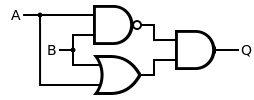

In [ ]:
# WORKING XOR
p_xor = lambda x: p_and(np.concatenate((p_nand(X), p_or(X)),axis=1))
p_xor(X)

### 4. `HOMEWORK` Build Logic class that has all the methods above put together.
1. Use it to build a [Half-adder](https://www.geeksforgeeks.org/half-adder-in-digital-logic/) (hint: you may implement combination of outputs to be an imput to other array).
2. Implement Half-adder using NAND gates only.
3. [*] (Additional) With the usage of our Perceptron gates implement 4 BIT PISO memory shift register. Use the for loop with wait condition to imitate the time passed. Create a simple animation and block diagram (5pts).

In [ ]:
from functools import WRAPPER_ASSIGNMENTS
# all together

'''
Use this class to store all the previously defined logical gates
'''
class Logic:

    # combine the outputs of two gates to be an input to another gate again
    def Comb(out1, out2):
        return np.concatenate([out1, out2], axis = 1)
    # take the input of the left side only
    def Left(x):
        return np.hsplit(x, 2)[0]
    # take the input of the right side only
    def Right(x):
        return np.hsplit(x, 2)[1]

    ########################### BASIC LOGIC ###########################
    def Not(x):
      return Perceptron(np.array([-2.5]), 2) * x

    def Or(x):
      return Perceptron(np.array([1,1]), -1) * x

    def And(x):
      return Perceptron(np.array([1,1]), -2) * x

    def Nand(x):
      return(Logic.Not(Logic.And(x)))

    def Xor(x):
       return Logic.And(np.concatenate((Logic.Nand(X), Logic.Or(X)),axis=1))

    # implement the half_adder
    def H_A(x):
      sum = Logic.Xor(x)
      carry = Logic.And(x)
      return sum, carry
    # implement the half_adder using NAND only
    def H_A_N(x):
        nand1   = Logic.Nand(x)
        nand2   = Logic.Nand(Logic.Comb(Logic.Left(x),nand1))
        nand3   = Logic.Nand(Logic.Comb(Logic.Right(x),nand1))
        sum    = Logic.Nand(Logic.Comb(nand2, nand3))
        carry   = Logic.Nand(Logic.Comb(nand1, nand1))
        return sum, carry

    def D_Flip_Flop(D, CLK, Q, Q_n):
      if CLK == [[1]]:
        if D == [[0]]:
          return D, 1
        else:
          return D, 0
      else:
        return Q, Q_n

    def PISO(D : np.array, W_S: np.array, CLKs : np.array):
      Q_1 = [[None]]
      Q_2 = [[None]]
      Q_3 = [[None]]
      Q_4 = [[None]]
      Q_n = [[None]]
      nand3_prev, nand6_prev, nand9_prev = [[0]],[[0]], [[0]]
      i= 0
      output = []
      for CLK in CLKs:
        Q_1, Q_n = Logic.D_Flip_Flop(D[0], CLK, Q_1, Q_n)
        nand1 = Logic.Nand(Logic.Comb(W_S[i], Q_1))
        nand2 = Logic.Nand(Logic.Comb(D[1], Logic.Not(W_S[i])))
        nand3 = Logic.Nand(Logic.Comb(nand1, nand2))
        Q_2, Q_n = Logic.D_Flip_Flop(nand3_prev, CLK, Q_2, Q_n)
        nand4 = Logic.Nand(Logic.Comb(D[2], Logic.Not(W_S[i])))
        nand5 = Logic.Nand(Logic.Comb(W_S[i], Q_2))
        nand6 = Logic.Nand(Logic.Comb(nand4, nand5))
        Q_3, Q_n = Logic.D_Flip_Flop(nand6_prev, CLK, Q_3, Q_n)
        nand7 = Logic.Nand(Logic.Comb(D[3], Logic.Not(W_S[i])))
        nand8 = Logic.Nand(Logic.Comb(W_S[i], Q_3))
        nand9 = Logic.Nand(Logic.Comb(nand7, nand8))
        Q_4, Q_n = Logic.D_Flip_Flop(nand9_prev, CLK, Q_4, Q_n)
        nand3_prev, nand6_prev, nand9_prev = nand3, nand6, nand9
        output.append(Q_4)
        i+=1
      return np.array(output)

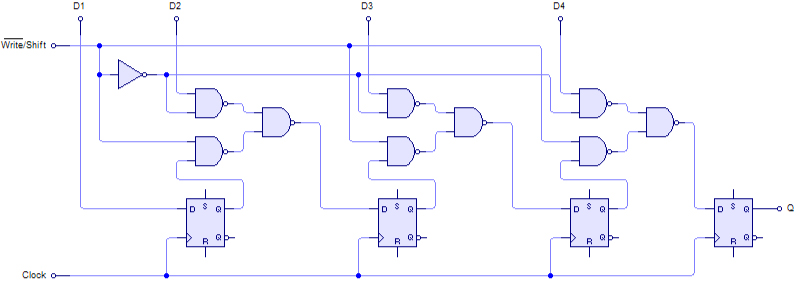

In [ ]:
X, Logic.Left(X), Logic.Right(X), Logic.And(X), Logic.Or(X), Logic.Xor(X), Logic.H_A(X), Logic.H_A_N(X), Logic.Nand(X)

#### PISO

In [ ]:
D = np.matrix([1,0,0,1])
W_S = np.matrix([1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
CLK = np.matrix([1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0])
out = Logic.PISO(D.T, W_S.T, CLK.T)
CLK = np.array(CLK)[0]
W_S = np.array(W_S)[0]

#### Animation

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')


o = []
c = []
w = []
time = []
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
for ax in [ax1, ax2, ax3]:

    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim([0, 500])
    ax.grid()

c_line, = ax1.plot([],[])
w_line, = ax2.plot([],[])
o_line, = ax3.plot([],[])
line=[c_line, w_line, o_line]

def animate(i):
  for k in range(20):
    time.append(i*20+k)
    plt.xlim([0, 100])
    o.append(np.array(out)[i][0][0])
    c.append(np.array(CLK)[i])
    w.append(np.array(W_S)[i])
    line[0].set_data(time,c)
    line[1].set_data(time,w)
    line[2].set_data(time,o)
  return line
ani = animation.FuncAnimation(fig, animate, blit=True, interval=10, repeat=False, frames=34)
ani

### 5. Perceptron training

#### a) For arbitrary function $f(x) : \mathbb{R}^N \rightarrow \mathbb{R}^M$ create a gradient descent algorithm that tracks the history of iterations.
Function shall return the minimum of the mapping.
- plot the corresponding points for one-dimensional function $f(x) = x^2 - x + 5$ for big and small learning rates.
- mark the steps with number.

In [ ]:
def gradient_descent(start, gradient, lr = 0.01, max_iter = 1000, tol = 0.01):
  steps = [start]
  for _ in range(max_iter):
      result = gradient(start)
      if result == 0:
        return steps, start
      else:
        start -= lr * result
      steps.append(start)
  return steps, start

In [ ]:
fun     = lambda x : x**2 - x + 5
diffun  = lambda x : 2*x - 1
start   = np.random.randint(0, 5)
history_small, result_small     = gradient_descent(start, diffun,
                                                   lr       =   0.01,
                                                   max_iter =   15)
history_big, result_big         = gradient_descent(start, diffun,
                                                   lr       =   0.8,
                                                   max_iter =   15)
print(history_small, result_small)
print("__________________________")
print(history_big, result_big)

#### Graph

In [ ]:
xval    = np.linspace(min(history_big), max(history_big), 500)
yval_s  = fun(np.array(history_small))
yval_b  = fun(np.array(history_big))

In [ ]:
plt.plot(xval, fun(xval), color = 'black', linestyle = '-')
for i, txt in enumerate(history_small):
    plt.annotate(str(i), (history_small[i], yval_s[i]), color = 'red')

for i, txt in enumerate(history_big):
    plt.annotate(str(i), (history_big[i], yval_b[i]), color = 'blue')

plt.plot(history_small, yval_s, color = 'red', linestyle = '--', label = '$\eta = 0.01$')
plt.plot(history_big, yval_b, color = 'blue', linestyle = ':', label = '$\eta = 0.8$')
plt.scatter(0.5, fun(0.5), s = 85, color = 'green')
plt.legend()

#### b) Linear regression
For the situation of linear regression (activation function is $f(x)=x$), implement the previous perceptron that can be taught to adjust its weights.
1. set the activation function to be $f(x) = x$,
2. implement fit(X, y) method that given training dataset $\{(\vec{X}_i, y_i)\}$ and starting from a random state adjusts the weights to predict the values the best as possible. Use previous gradient descent attitude.
3. in order to do so, implement the loss function method to be $L_{MSE}$. '
4. for linear regression, gradient of the loss function can be calculated analyticaly - reference the lecture notes.
5. use parameter batch if batches are to be calculated in gradient descent
6. download the [Fish](https://www.kaggle.com/datasets/aungpyaeap/fish-market/code) dataset from Kaggle and try to fit the linear regression model to find the weight of the fish according to other columns. In order to do so, divide the dataset on 70% of train and 30% of test vectors. Use [train-test-split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or your function.
7. try to find the best accuracy according to the $L_{MSE}$ loss function.
8. read the documentation of `scikit` library for [Linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), compare results using it for our perceptron.


In [ ]:
class PerceptronNew(Perceptron):
    # Initialize the bias and the dimension of the perceptron.
    # Initialize the weights to be zero (for now at least)
    def __init__(self, W : np.array,  b = 0, epo = 100, lr = 0.01):
        super().__init__(W, b)
        self.__epo  = epo
        self.__lr   = lr

    # Create getters for the perceptron.
    def get_lr(self):
      return self.__lr
    def get_epo(self):
      return self.__epo

    ############################## SETTERS ##############################
    def set_lr(self, lr):
      self.__lr = lr

    def set_epo(self, epo):
      self.__epo = epo


    ############################## PERCEPTRON METHODS ##############################

    # implement the activation function
    def activation_function(self, X):
      return np.matrix(X*self.W+self.b).T
    # use this loss function to calculate the correctness of the perceptron - MSE
    def loss(self, y_true : np.array, y_pred : np.array):
      return np.mean((y_true - y_pred))


    # give fit the parameter randomstate and whenever it is not None, the weights
    # are reset to be random normal - this ensures random starting point of gradient descent
    # open the lecture notes or derive it yourself!
    def fit(self, X, y, randomstate = None, batch = 1):

        if type(X) != np.ndarray:
            X = X.to_numpy()
        if type(y) != np.ndarray:
            y = y.to_numpy().reshape(-1,1)

        # set the appropriate weights
        if randomstate is not None:
            self.W = np.random.normal(0.0, 0.1, self.N)
            self.b = np.random.normal(0.0, 1.0)

        history     = []
        bucket_num  = len(X) // batch
        print(bucket_num)
        # slice the input in to be multiple batches! make a lambda function or slice beforehand
        slicing     = lambda x: np.split(x, bucket_num)

        # go through epochs
        for epo in range(self.__epo):
            # iterate batches
            loss    = 0.0
            # go through bins
            for bin in range(1, bucket_num + 1):
                X_slice = slicing(X)[bin-1]
                y_slice = slicing(y)[bin-1]

                pred    = self.activation_function(X_slice)
                #print(pred, y_slice)
                #delta_i =
                #suma_w  =
                #suma_b  =

                # calculate loss
                loss    = self.loss(y_slice, pred)
                # update the weights
                self.W  += loss * self.get_lr()
                self.b  += loss * self.get_lr()
                #print(f'\t->epo:{epo}:bin={bin}')
            # average loss
            loss    /=  bucket_num
            print(f'epo:{epo}->loss={loss}')
            history.append(loss)
        return history

    def plot_history(self, history):
        plt.xlabel('epo')
        plt.ylabel('loss')
        plt.plot(history)

##### TEST LINEAR REGRESSORS ON RANDOM DATA!

In [ ]:
X = np.arange(0, 100, 1)
y = 3 * X + 5 + np.random.normal(0, 1e1, size = len(X))

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

X_train = X[:int(0.8 * len(X))]
y_train = y[:int(0.8 * len(y))]
X_test  = X[int(0.8 * len(X)):]
y_test  = y[int(0.8 * len(y)):]

In [ ]:
lin_reg = PerceptronNew(np.array([5]), 1)
lin_reg.set_lr(1e-4)
history = lin_reg.fit(X=X_train, y=y_train, randomstate=42, batch=2)
lin_reg.plot_history(history)

In [ ]:
plt.scatter(X_train, y_train, color="blue", s=10, label="train_data")
plt.scatter(X_test, y_test, color="green", s=10, label="test_data");
plt.scatter(X_test, np.array(lin_reg.activation_function(X_test).reshape(-1,1)), color="red", s=10, label="pred_data")
plt.legend();

##### TEST LINEAR REGRESSORS ON REAL LIFE DATA

In [ ]:
df          = pd.read_csv('data/Fish.csv')
print(df.dtypes)
train_cols  = ['Length1','Length2','Length3','Height','Width']
df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

categorical_transformer = LabelEncoder()
cols                                = [df.columns[0]] + list(df.columns[2:])
y = df[cols[0]]
X = df[cols[1:]]
y = categorical_transformer.fit_transform(y)
X_train, X_test, y_train, y_test    = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

In [ ]:
y_train.shape

In [ ]:
min_loss    = 1e+10
best_lr     = None
# train multiple learning rates and save the best one
for lr in np.linspace(1e-6, 2e-4, 20):
    # create our new Perceptron, initialize it with zeros
    p       = PerceptronNew(W=np.array([0.,0.,0.,0.,0.]), b= 0., lr=lr)
    # save the history
    history = p.fit(X=X_train, y=y_train)
    loss    = history[-1]
    if loss < min_loss:
        min_loss    = loss
        best_lr     = lr
    # plot history
    p.plot_history(history)

In [ ]:
print("Best learning rate = ", best_lr)

In [ ]:
y_pred  = p.activation_function(X_test)
mse     = np.mean(np.square(y_test - y_pred))
mse

Create a LinearRegression class from scikit-learn

In [ ]:
reg         = LinearRegression().fit(X_train, y_train)
y_pred_sk   = reg.predict(X_test)
reg.score(X_test, y_test)

In [ ]:
mse_sk      = np.mean(np.square(y_pred_sk - y_test))
mse_sk

# Next labs - the same topic

Probably code delivered by Maks

In [ ]:
class PerceptronLinear(Perceptron):
    # Initialize the bias and the dimension of the perceptron -> but not only that
    def __init__(self, W : np.array,  b = 0, epo = 100, lr = 0.01):
        super().__init__(W, b)
        # how many learning iterations we give
        self.epo = epo
        # what is our step in the gradient
        self.lr = lr

    ############################## GETTERS ##############################

    def get_lr(self):
        return self.lr

    def get_epo(self):
        return self.epo

    ############################## SETTERS ##############################

    def set_lr(self, lr):
        self.lr = lr

    def set_epo(self, epo):
        self.epo = epo

    ############################## PERCEPTRON METHODS ##############################
    '''
    As you can see the activation function has been changed to linear regression. What does reshape do?
    After you figure it out, note that it is the usual way of having the output of the machine learning algorithm. Why?
    '''
    def activation_function(self, X):
        return (self.net_output(X)).reshape(-1,1)

    '''

    Loss function for the perceptron -> here we use the Mean Square Error
    '''
    def loss(self, y_true : np.array, y_pred : np.array):
        square = np.square(y_true - y_pred)
        return np.mean(square)

    '''
    Single step of the gradient, here it is calculated analytically (linear regression)
    '''
    def gradient(self, x_true, y_true, prediction):
        delta_i = (y_true.flatten() - prediction)
        suma_w = np.multiply(delta_i[:, np.newaxis], x_true)
        suma_b = delta_i
        return suma_b, suma_w

    '''
    Fit function allows to obtain the (probably most?) correct weights for the perceptron via the gradient descent algorithm.
    '''
    def fit(self, X, y, randomstate = None, batch = 1, verbose = False):

        if type(X) != np.ndarray:
            X = np.array(X)
        if type(y) != np.ndarray:
            y = np.array(y).reshape(-1,1)

        # give fit the parameter randomstate and whenever it is not None, the weights
        # are reset to be random normal - this ensures random starting point of gradient descent
        if randomstate is not None:
            self.W = np.random.normal(0.0, 0.1, self.N)
            self.b = np.random.normal(0.0, 1.0)

        # Save the history of the losses. Why?
        history = []
        # If we want to calculate the gradient in buckets (look for description of the batch)
        bucket_num = len(X) // batch
        # slice the data onto batches without shuffling (no stochasticity)
        slicing = lambda x, b: x[(b-1)*batch:b*batch]

        # iterate epochs
        for epo in range(self.epo):
            # iterate batches
            loss = 0.0
            for bin in range(1, bucket_num + 1):
                X_slice = slicing(X,bin)
                y_slice = slicing(y,bin)
                # predict the output for a given slice (what is the shape of the output?)
                pred = self.predict(X_slice)

                suma_b, suma_w = self.gradient(X_slice, y_slice, pred.flatten())

                # calculate loss
                loss += self.loss(y_slice, pred.flatten())

                # update the weights
                self.W += np.mean(suma_w, axis = 0) * self.lr
                self.b += np.mean(suma_b, axis = 0) * self.lr
            # calculate average loss
            loss/=bucket_num
            if verbose:
                print(f'epo:{epo}->loss={loss}')
            history.append(loss.flatten())
        return np.array(history).flatten()
    '''
    Basic history plot
    '''
    def plot_history(self, history, ax = None):
        if ax is None:
            fig, ax = plt.subplots()
        ax.set_xlabel('epo')
        ax.set_ylabel('loss')
        ax.plot(history)

#### b) Test the linear Perceptron on linearized data with normal noise.

In [ ]:
X       = np.arange(0, 100, 1)
y       = 3 * X + 5 + np.random.normal(0, 1e1, size = len(X))

X       = X.reshape(-1, 1)
y       = y.reshape(-1, 1)

X_train = X[:int(0.8 * len(X))]
y_train = y[:int(0.8 * len(y))]
X_test  = X[int(0.8 * len(X)):]
y_test  = y[int(0.8 * len(y)):]

In [ ]:
lin_reg = PerceptronLinear([5,], 1)
lin_reg.set_lr(1e-5)
history = lin_reg.fit(X=X_train, y=y_train, randomstate=42, batch=3)
lin_reg.plot_history(history)

In [ ]:
plt.scatter(X_train, y_train,
            color="blue", s=10, label="train_data")
plt.scatter(X_test, y_test,
            color="green", s=10, label="test_data")
plt.scatter(X_test, lin_reg.activation_function(X_test).reshape(-1, 1), color="red", s=10, label="pred_data")
plt.legend();

#### c) Taking the inspiration from the work above, work out the procedure to create a Perceptron that is able to learn basic binary classification.

Where is the gradient in this equation?
- calculate the gradient analyticaly and see for yourself.
- derive methods from PerceptronLinear

In [ ]:
class PerceptronBinary(PerceptronLinear):
    def __init__(self, W : np.array,  b = 0, epo = 100, lr = 0.01):
        super().__init__(W, b, epo, lr)

    '''
    $\Phi(x) = sign(x)
    '''
    def activation_function(self, X):
        return np.where(self.net_output(X) >= 0.0, 1.0, -1.0).reshape(-1,1)

    '''
    Loss function for the perceptron -> here we use knowledge that the classes can be either {-1, 1}
    '''
    def loss(self, y_true : np.array, y_pred : np.array):
        square = np.square(1 - y_true * y_pred)
        return np.mean(square)

    '''
    Single step of the gradient, here it is calculatable analytically (linear regression).
    It shall return a numpy array for bias and for weights (which will be later summed, hence the name sum), where the elements correspond to different samples in one batch.
    Remember that it should work also for batch updates.
    '''
    def gradient(self, x_true, y_true, prediction):
        val     = np.multiply(y_true, (1.0-y_true * prediction))
        suma_w  = np.multiply(val, x_true)
        suma_b  = val
        return suma_b, suma_w

#### d) Use the Perceptron above to check, whether you were right about the weights during the previous lab!


In [ ]:
a       = PerceptronBinary(np.random.random(2), np.random.random(), 100, 1e-1)
x_train = [[0.,1.], [2.,0.], [1.,1.], [2.,3.]]
y_train = [-1., -1., 1.,1.]
for d in x_train:
    plt.scatter(d[0],d[1])
plt.legend(y_train)

In [ ]:
history = a.fit(x_train, y_train)
a.plot_history(history)
a.predict(x_train), a.get_W()

What happens when the data is not linearly seperable?

In [ ]:
def find_orthogonal_vector(x):
    '''
    Given a vector x, find a vector orthogonal to it randomly
    '''
    x_p     =   np.random.random(len(x))
    # take out the vector that is in line with x
    x_p     -=  x_p.dot(x) * x / np.linalg.norm(x)**2.0
    return x_p

def find_plane_from_ort(perp1, perp2):
    '''
    Given two points, perp1 and perp2, find vector connecting those two points.
    '''
    # a * x1 + b = y1
    # a * x2 + b = y2
    # -> a * (x1-x2) = (y1-y2) -> a = (y1-y2)/(x1-x2)
    a = (perp1[1] - perp2[1]) / (perp1[0] - perp2[0])
    b = perp1[1] - a * perp1[0]
    return a, b

#### e) Take 50 randomly initialized points in 2D -> $r=[x=rand(), y=rand()]$ such that $x,y \in [-1,1]$.
For each of them assign a class such that:

\begin{equation}
\hat{y} =
\left \{
   \begin{array}{lr}
       1 & y \geq 3 * x - 1 \\
       -1 &\text{otherwise}
   \end{array}
\right .
\end{equation}

Randomly initialize vector $\vec{W}$ of the perceptron.

Train the perceptron to fit the data. Use 50 epochs. At each 10th epoch plot the vector perpendicular to $\vec{W}$ Use the functions above to find the perpendicular vector and plane (line) in 2D. What can we tell about the learning algorithm? `We will use 2D input data to visualise the behavior of learning.`


In [ ]:
x = (np.random.random(50) * 2) - 1
y = (np.random.random(50) * 2) - 1
r = np.stack((x, y), axis=-1)
y_t = np.where((y >= 3*x - 1), 1.0, -1.0)
for d in r:
    plt.scatter(d[0],d[1])
b       = PerceptronBinary(np.random.random(2), np.random.random(), 10, 1e-1)
history = b.fit(r, y_t)
a.plot_history(history)
history = b.fit(r, y_t)
a.plot_history(history)
history = b.fit(r, y_t)
a.plot_history(history)
history = b.fit(r, y_t)
a.plot_history(history)
history = b.fit(r, y_t)
a.plot_history(history)
#a.predict(x_train), a.get_W()

##### [DISCLAIMER] Note that the plot of the decision bound is in fact here just conceptual as $W_0=b$ is also sought with the gradient descent and is not used for the plot.


#### f) Calculate the gradient $\frac{\partial}{\partial W_k}$ of the newly created loss function with the softmax activation.
$$ L_i = \log(1+e^{ -y^i\vec{X}^i\cdot \vec{W}}). $$
Change perceptron and use it for classification of the random data again. Which activation performs better? Try using batches.

In [ ]:
class PerceptronSoftmax(PerceptronLinear):
    def __init__(self, W : np.array,  b = 0, epo = 100, lr = 0.01):
        super().__init__(W, b, epo, lr)

    '''
    $\Phi(x) = sign(x)
    '''
    def activation_function(self, X):
        return np.where(self.net_output(X) >= 0.0, 1.0, -1.0).reshape(-1,1)


    def loss(self, y_true : np.array, y_pred : np.array):
        exp = np.exp(-y_true * y_pred)
        return np.log(1+exp)

    '''
    Single step of the gradient, here it is calculatable analytically (linear regression)
    '''
    def gradient(self, x_true, y_true, prediction):
        val     = np.multiply(y_true, np.exp(1.0-(y_true * prediction))) #exp missing
        suma_w  = np.multiply(val, x_true)
        suma_b  = val
        return suma_b, suma_w
        pass

Test it!

In [ ]:
fig, ax = plt.subplots(2, figsize = (10,15))
# create separating function
sep_fun = lambda x, y: 1 if y >= 3*x - 1 else -1
# generate random data and asign labels
x_train = 2.0 * np.random.random((50, 2)) - 1.0
y_train = np.array([sep_fun(x,y) for (x,y) in x_train])



# set the classes for the plot
colors  = ['red' if y > 0 else 'blue' for y in y_train]
labels  = ['1' if y > 0 else '-1' for y in y_train]
ax[0].plot(x, 3*x-1, linestyle=':', label = r'True $\vec V_{\rm sep}$: $f(x) \equiv y = 3x-1$')
ax[0].scatter(x_train[:,0], x_train[:,1], c = colors)
ax[0].set_xlim(-2,1)
ax[0].set_ylim(-1,1)

def plotTrainingPlane(  W : np.ndarray,
                        ax,
                        color,
                        label):
    '''
    Plot the training plane finding the vectors corresponding to W!
    - W : vectors of weights at given step in two dimensions
    '''
    # set the x_range to plot the real line:
    x     = np.arange(-1, 1, 1e-2)
    # we must find two points in order to find where the random vector goes
    # first point can be set where -W finishes (for convenience :))
    perp1 = -W
    perp2 = find_orthogonal_vector(W) + perp1
    print(perp1, perp2)
    # find the line connecting those two points
    plane = find_plane_from_ort(perp1, perp2)
    # scatter the plane vectors
    ax.scatter(x, plane[0] * x + plane[1], color = color,
               label = 'epo=' + str(i) + r':$\vec V _{i}$', s=5)
    # plot the vectors that are orthogonal to this plane
    ax.plot([0.0, W[0]],
            [0.0, W[1]],
            color = color,
            ls  =  '-')
    ax.plot([0.0, -W[0]],
            [0.0, -W[1]],
            marker = 'x',
            color = color,
            ls  =  '-')
    ax.annotate(text = f'$W(epo={i})$', xy=[W[0], W[1]], fontsize = 14)


# set the initial vector W to be two-dimensional random
W       = np.random.random(2)
# create the perceptron
p       = p=PerceptronSoftmax(W, np.random.random(), 1, 5e-2)

epo     = 60
modulo  = 20
history = []
colors  = iter(['red', 'orange', 'green', 'blue', 'pink'])
for i in range(epo):
    if i % modulo == 0:
        plotTrainingPlane(W, color = next(colors), ax = ax[0], label = i)
        print("Accuracy: ", np.mean(p.predict(x_train).flatten() == y_train))

    history = history + list(p.fit(x_train, y_train))
    W       = p.get_W()
ax[0].scatter([0], [0], marker = 'o', s = 40, color = 'black')
ax[0].legend(loc = 'best', frameon = False, fontsize = 14)
ax[0].set_title("Note that due to the bias, we cannot find out real corresponding plane, it's the slope that matters")
p.plot_history(history, ax[1])


### Newton's method.
For smaller datasets it is sometimes usefull to use the Newton's method to find the function minumum with faster convergence. Suppose we have some function:
$$ f : \mathbb{R} \rightarrow \mathbb{R} .$$

We try to find a value where f(x) = 0 (or as close as possible). For this we set some initial point $x_0$ and calculate $f(x_0)$. If $x_0$ is near some real point close to 0 - $\alpha$, then the tangent line at $x_0$ crosses the x-axis closer and closer to $\alpha$.

<center><img src=https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif></center>


In [ ]:
def find_a_and_b_and0(prev_x, prev_y, diff):
    # y_0 = a_0 * x_0 + b_0 -> b_0 = y_0 - a_0*x_0
    a       = diff(prev_x)
    b       = prev_y - a * prev_x
    zero    = - b / a
    return a, b, zero

x   =np.arange(-1,1,1e-2)
f   = lambda x : np.square(x)
df  = lambda x : 2 * x

plt.plot(x, f(x))
plt.axvline(0.0, c='black')
plt.axhline(0.0, c='black')

x_0 = 0.75
y_0 = f(x_0)
plt.scatter(x_0, y_0, c='red')

# find first tangent line
a_0, b_0, x_1   = find_a_and_b_and0(x_0, y_0, df)
y_1             = f(x_1)
plt.plot(x[len(x)//2:], a_0 * x[len(x)//2:] + b_0)
plt.scatter(x_1, y_1, c='red')

# find second tangent line
a_1, b_1, x_2   = find_a_and_b_and0(x_1, y_1, df)
y_2             = f(x_2)
plt.plot(x[len(x)//2:], a_1 * x[len(x)//2:] + b_1)
plt.scatter(x_2, y_2, c='red')

# find third tangent line
a_2, b_2, x_3   = find_a_and_b_and0(x_2, y_2, df)
y_3             = f(x_3)
plt.plot(x[len(x)//2:], a_2 * x[len(x)//2:] + b_2)
plt.scatter(x_3, y_3, c='red')

#### e) Add the method to calculate Newton-Raphson algorithm in the previous Perceptron. In order to do this, calculate the derviative:

$$ H_{ij} = \frac{\partial ^2 }{\partial w_i \partial w_j} \log(1+e^{ -y^i\vec{X}^i\cdot \vec{W}}).$$

In [ ]:
class PerceptronSoftmax(PerceptronLinear):
    def __init__(self, W : np.array,  b = 0, epo = 100, lr = 0.01):
        super().__init__(W, b, epo, lr)

    '''
    $\Phi(x) = sign(x)
    '''
    def activation_function(self, X):
        return np.where(self.net_output(X) >= 0.0, 1.0, -1.0).reshape(-1,1)

    def loss(self, y_true : np.array, y_pred : np.array):
        pass

    def gradient(self, x_true, y_true, prediction):
        '''
        Single step of the gradient, here it is calculatable analytically (linear regression)
        '''
        pass

    def hessian(self, x_true, y_true, y_pred):
        hess = np.zeros((len(x_true) + 1, len(x_true) + 1))
        pass

    def newton_rap(self, X, y, randomstate = None, verbose = False):
        '''
        https://youtu.be/8yis7GzlXNM?si=woJFmzvTuqjYashv
        '''
        if type(X) != np.ndarray:
            X = np.array(X)
        if type(y) != np.ndarray:
            y = np.array(y).reshape(-1,1)

        # give fit the parameter randomstate and whenever it is not None, the weights
        # are reset to be random normal - this ensures random starting point of gradient descent
        if randomstate is not None:
            self.W = np.random.normal(0.0, 0.1, self.N)
            self.b = np.random.normal(0.0, 1.0)

        # Save the history of the losses. Why?
        history = []

        # iterate epochs
        for epo in range(self.epo):
            # iterate batches
            loss = 0.0
            for i, X_slice in enumerate(X):
                y_slice = y[i]
                # predict the output for a given slice (what is the shape of the output?)
                pred    = self.predict(X_slice)
                suma_b, suma_w = self.gradient(X_slice, y_slice, pred.flatten())
                # calculate the gradient
                grad    = np.array(list(suma_b.flatten()) + list(suma_w.flatten()))
                # calculate the hessian
                hessian = self.hessian(X_slice, y_slice, pred.flatten())
                # calculate the update vector (use pseudoinverse to be numerically safe)
                update  = np.linalg.pinv(hessian).dot(grad)
                # update weights
                self.W  += np.array(self.lr*update[1:])
                self.b  += np.array(self.lr*update[0])
                # calculate loss
                loss    += self.loss(y_slice, pred.flatten())

            if verbose:
                print(f'epo:{epo}->loss={loss}')
            history.append(loss.flatten())
        return np.array(history).flatten()

#### h) Use the following data to test the algorithm for Newton-Rhapson
Use 5 epochs and $\vec{W} = [1],b=1$ as a starting point.

In [ ]:
X = np.array([-0.3, -0.1, 0.3, 0.5, 1.0, 1.3, 4.5, 3.5]).reshape(-1,1)
Y = np.array([-1,-1,-1, -1, 1,1,1,1],dtype=np.float64).reshape(-1,1)
plt.plot(X,Y)
plt.scatter(X,Y,c='red')
plt.xlabel('x')
plt.ylabel('class')

In [ ]:
p       =   PerceptronSoftmax(np.array([1.]),1., epo = 20)
history =   p.newton_rap(X, Y)
p.plot_history(history)
p.predict(X)

#### i) Do the same for vector $\vec{W}=[4.0], b=-10$.

In [ ]:
p       =   PerceptronSoftmax(np.array([4.]),-10., epo = 100)
history =   p.newton_rap(X.reshape((-1,1)), Y.reshape((-1,1)))
p.plot_history(history)
p.predict(X.reshape(-1,1))

# Logistic regression

#### k) Create the logistic regression algorithm using the information from above. Implement Newton-Rhapson for it as well.

In [ ]:
import scipy as sc

In [ ]:
class PerceptronLogistic(PerceptronBinary):
    def __init__(self, W : np.array,  b = 0, epo = 100, lr = 0.01):
        super().__init__(W, b, epo, lr)

    def activation_function(self, X):
        return sc.special.expit(X*self.W).shape(-1,1)

    def loss(self, y_true : np.array, y_pred : np.array):
        lg = np.log(1 - y_pred)
        mul = np.multiply((1-y_true), lg)
        lh = np.multiply(y_true, np.log(y_pred))
        return lh + mul

    def gradient(self, x_true, y_true, prediction):
      sig = self.activation_function(np.multiply(self.W * x_true))
      return np.multiply((y_true - sig), x_true)

In [ ]:
# data
X = (np.concatenate((np.random.uniform(low=-2.0, high=0.4, size=50), np.random.uniform(low=-0.4, high=3.0, size=50)))).reshape(-1,1)
Y = np.array([0]*50 + [1]*50).reshape(-1,1)

# fit the perceptron
p=PerceptronLogistic([1],0.1,500,0.01)
history=p.fit(X, Y)
p.plot_history(history)
Y_pred = p.predict(X)
plt.show()

# plotting data and prediction
plt.scatter(X,Y_pred)
plt.scatter(X,Y,c='red')
plt.xlabel('x')
plt.ylabel('class')
plt.show()